## 0. 환경 세팅

### 소요시간 확인을 위한 autotime 라이브러리 

In [1]:
# 시간 측정 
# !pip install ipython-autotime
%load_ext autotime

time: 884 µs (started: 2021-01-26 16:23:40 +09:00)


### Random seed 설정 
- 같은 결과를 유지하기 위해 설정해준다. 튜닝으로 개선할 수 도 있으나 기존 RNN을 사용한 사례에서 seed값을 일단 참고했다.

In [2]:
import os, random
import tensorflow as tf
import numpy as np 

# random seed 
def set_seeds(seed):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
    
SEED = 10
set_seeds(SEED)

time: 1.32 s (started: 2021-01-26 16:23:40 +09:00)


### GPU 세팅
* 아래 두가지 모두 같은 기능을 하는 것으로 알고 있습니다!

In [9]:
# os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true' # 노드를 진행할때도 해당 코드를 한번 실행해주고 Tensorflow를 사용해보세요!

time: 202 µs (started: 2021-01-26 16:25:04 +09:00)


In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
        
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs
time: 162 ms (started: 2021-01-26 16:23:41 +09:00)


## 1. 데이터 다듬기

### 데이터 디렉토리 만들기

file:///home/aiffel-dj19/Downloads/def.png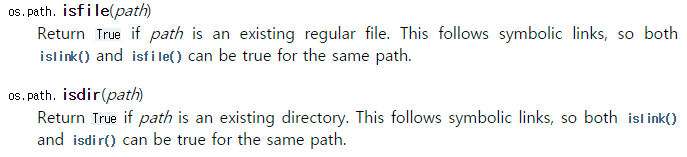

In [5]:
# import os # 위에서 이미 import 했습니다. 

project_path = os.getenv("HOME")+'/aiffel/lyricist'

if not os.path.isdir(project_path):
    os.mkdir(project_path)

else:
    print("project_path에 폴더가 이미 존재합니다.")

project_path에 폴더가 이미 존재합니다.
time: 956 µs (started: 2021-01-26 16:23:42 +09:00)


In [6]:
# 절대 경로를 줘야함. 
data_path = os.getenv("HOME")+'/aiffel/lyricist/data'
models_path = os.getenv("HOME")+'/aiffel/lyricist/models'

if not os.path.isdir(data_path):
    os.mkdir(data_path)

else:
    print("data_path에 폴더가 이미 존재합니다.")
    
if not os.path.isdir(models_path):
    os.mkdir(models_path)    

else:
    print("models_path에 폴더가 이미 존재합니다.")  

data_path에 폴더가 이미 존재합니다.
models_path에 폴더가 이미 존재합니다.
time: 706 µs (started: 2021-01-26 16:23:43 +09:00)


In [7]:
!pip install wget

time: 1.03 s (started: 2021-01-26 16:23:43 +09:00)


In [8]:
import wget

url = 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt'
shakespeare_path = data_path + '/shakespeare.txt'

if not os.path.isfile(shakespeare_path):
    wget.download(url, out = shakespeare_path)

else:
    print("shakespeare.txt가 이미 존재합니다.")

shakespeare.txt가 이미 존재합니다.
time: 2.39 ms (started: 2021-01-26 16:23:44 +09:00)
